# Classification - Prediction of Bank churn customer

## Import Library

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
df=pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.shape

(10000, 13)

## Null value

In [7]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
id=df[['CustomerId','Surname','Exited']]
id.head()

,CustomerId,Surname,Exited
0,15634602,Hargrave,1
1,15647311,Hill,0
2,15619304,Onio,1
3,15701354,Boni,0
4,15737888,Mitchell,0


In [9]:
data=df.drop(['CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Categorical and Continuous

In [10]:
cat=[]
num=[]
for x in data.columns:
  if df[x].nunique()<11:
    cat.append(x)
  else:
    num.append(x)

In [11]:
cat=cat+['Geography']
cat

['Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Geography']

In [12]:
num.remove('Geography')
num

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Univariate Analysis

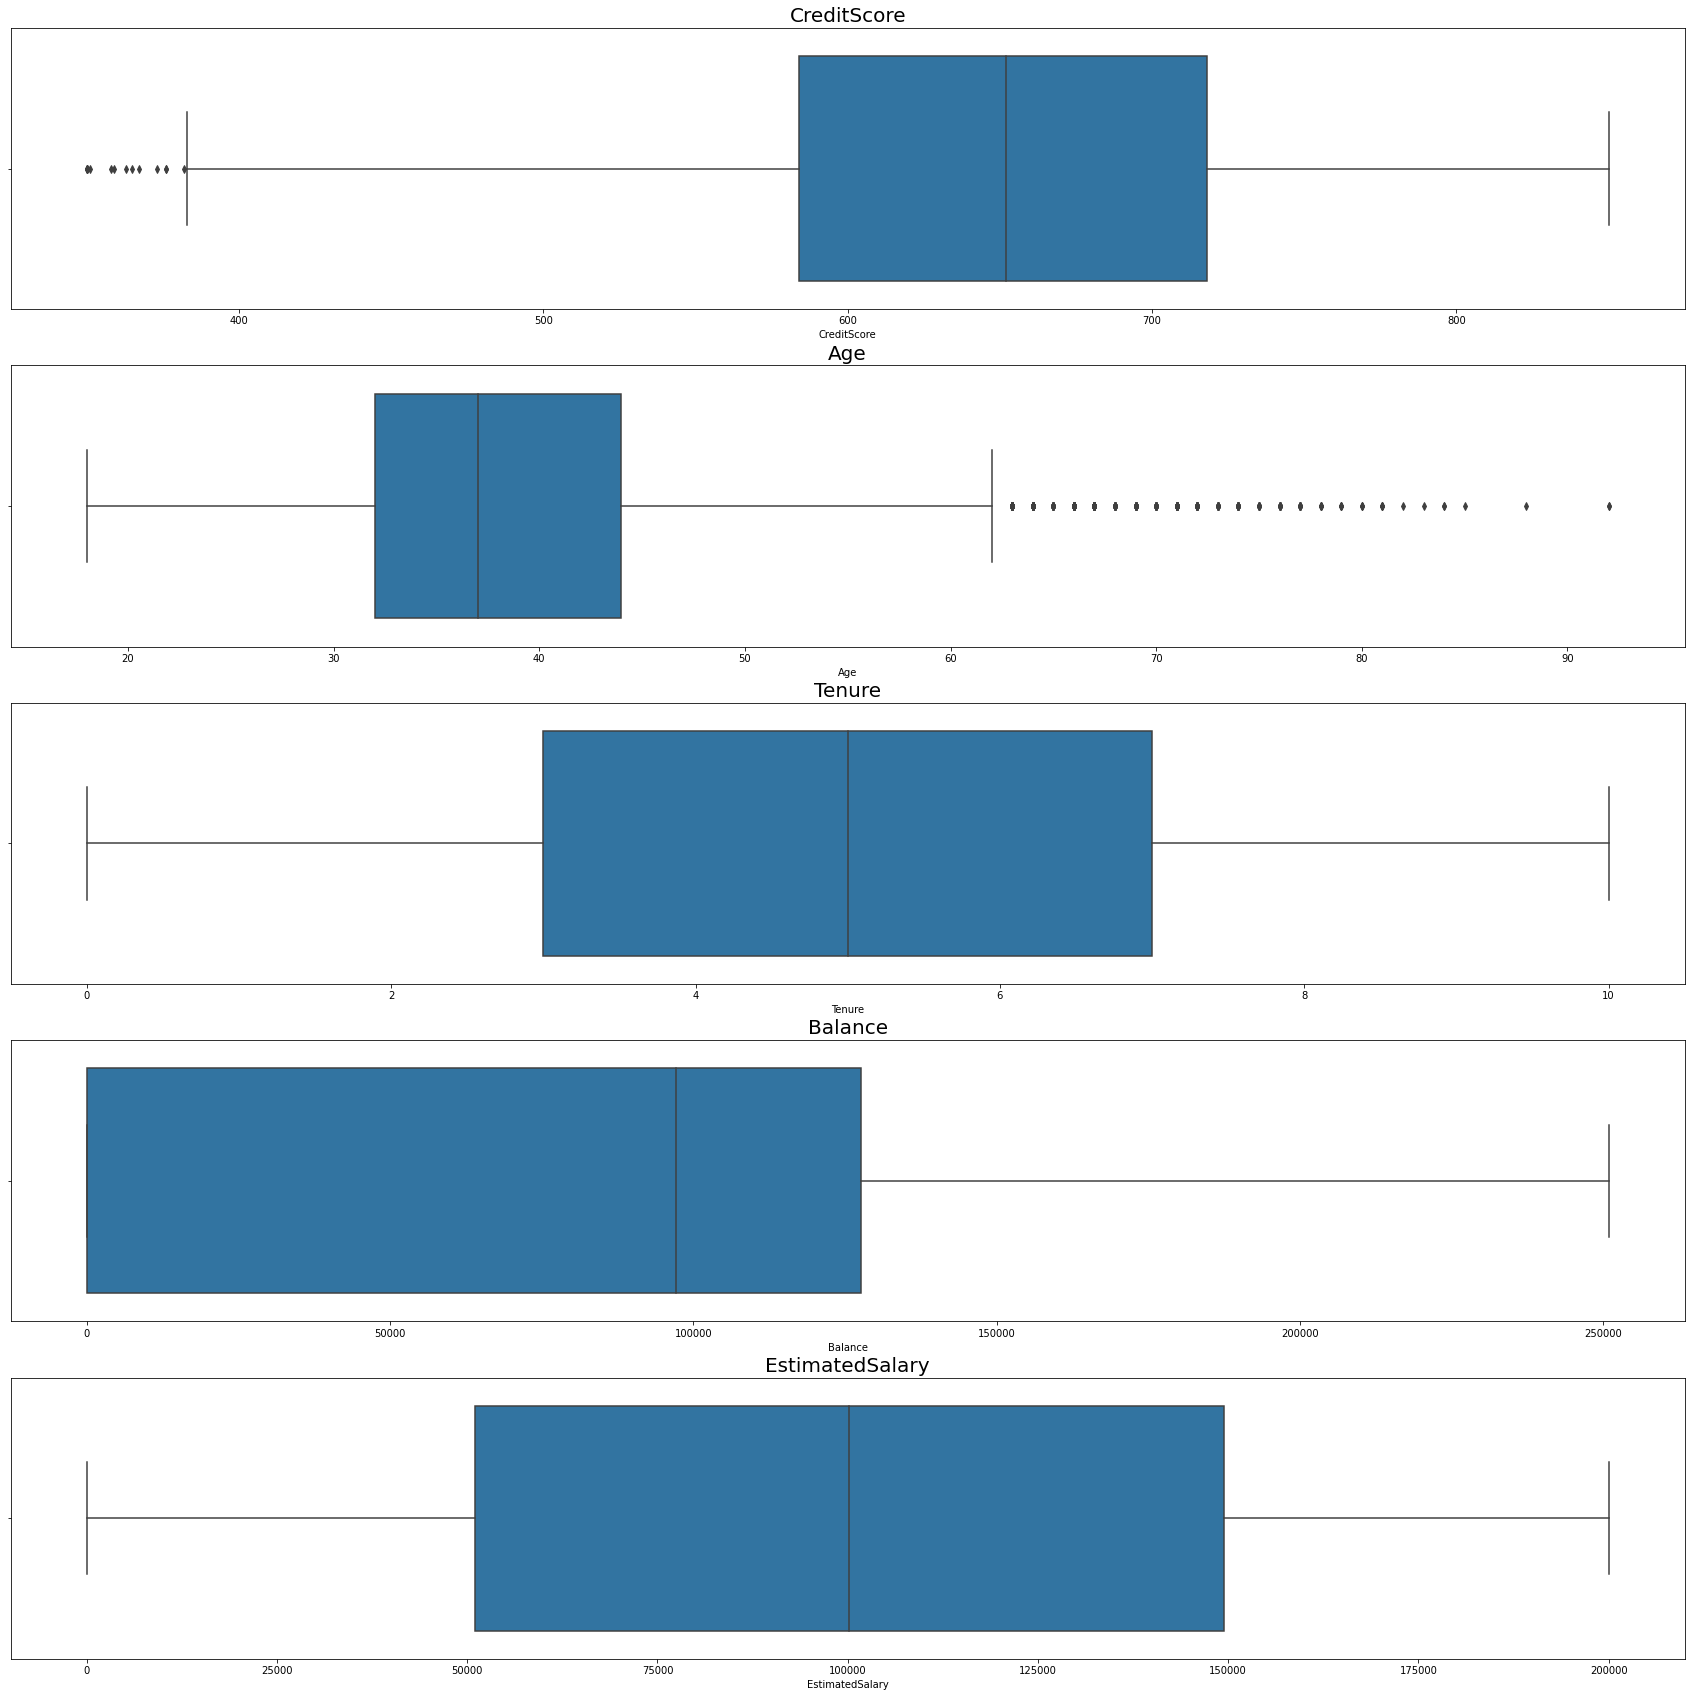

In [13]:
b1=num
plt.figure(figsize=(30,30))
i=0
for x in b1:
#     print(x)
    i=i+1
    plt.subplot(5,1,i)
    sns.boxplot(data[x])
    plt.title(f"{x}",fontsize=20)
plt.show()

In [14]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# No outlier 

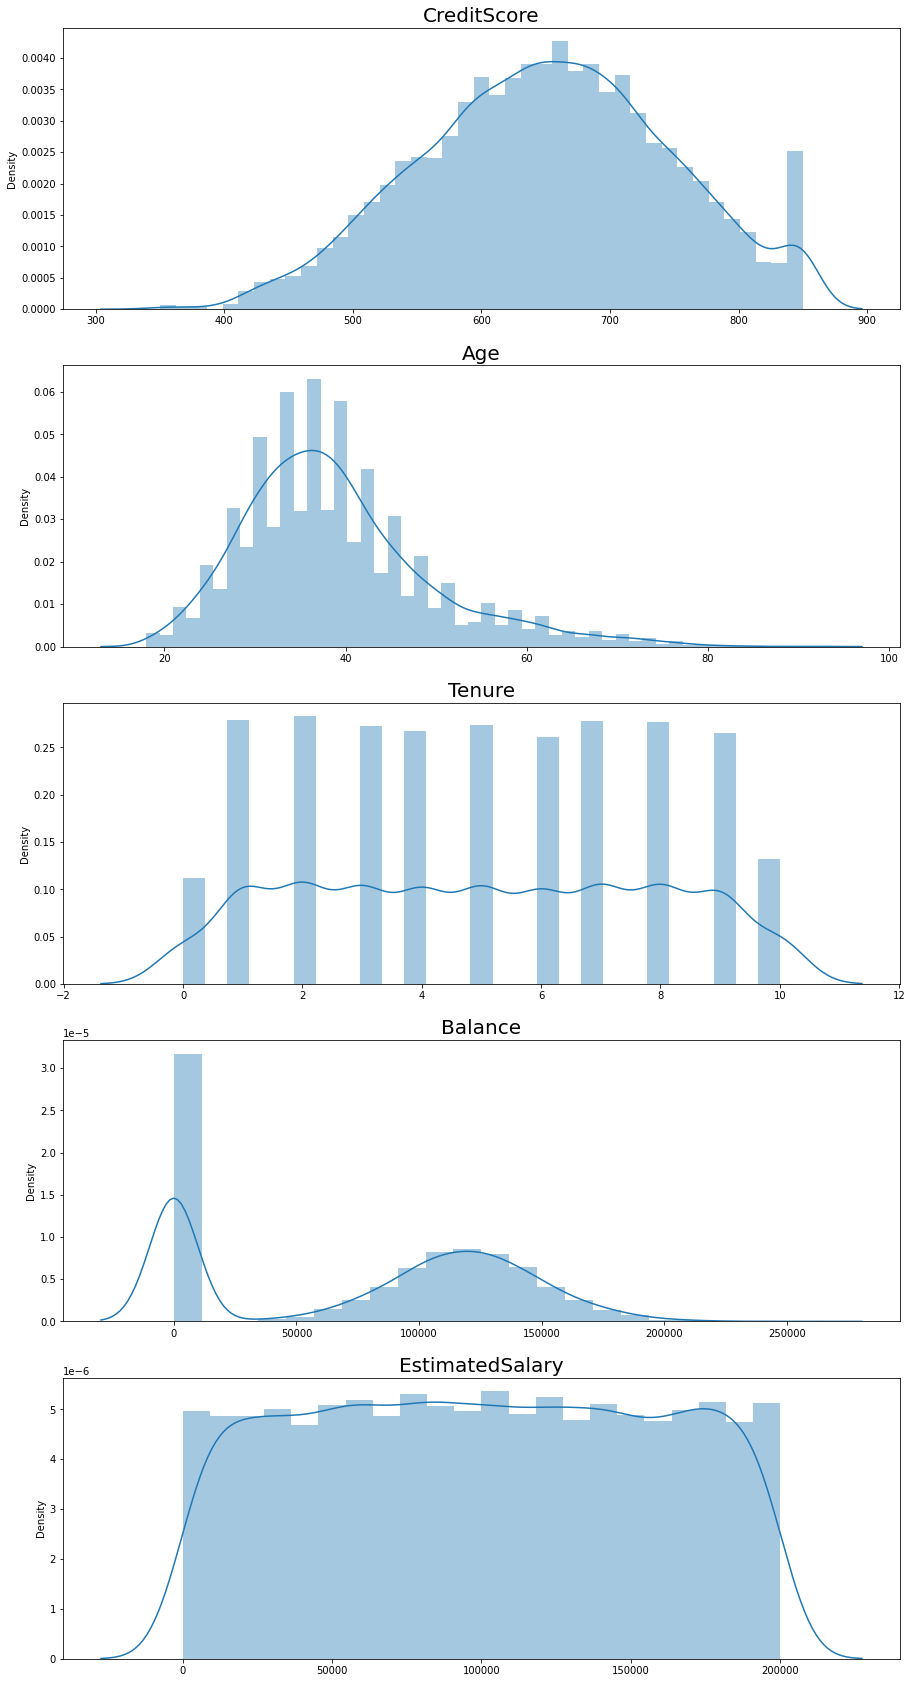

In [15]:
b=list(enumerate(num))
plt.figure(figsize=(15,30))
for x in b:
    plt.subplot(5,1,x[0]+1)
    sns.distplot(x=data[x[1]])
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

1. majority of customer have the credit score between 600 to 750.
2. majority of customer belongs to the age group of 30 to 40.

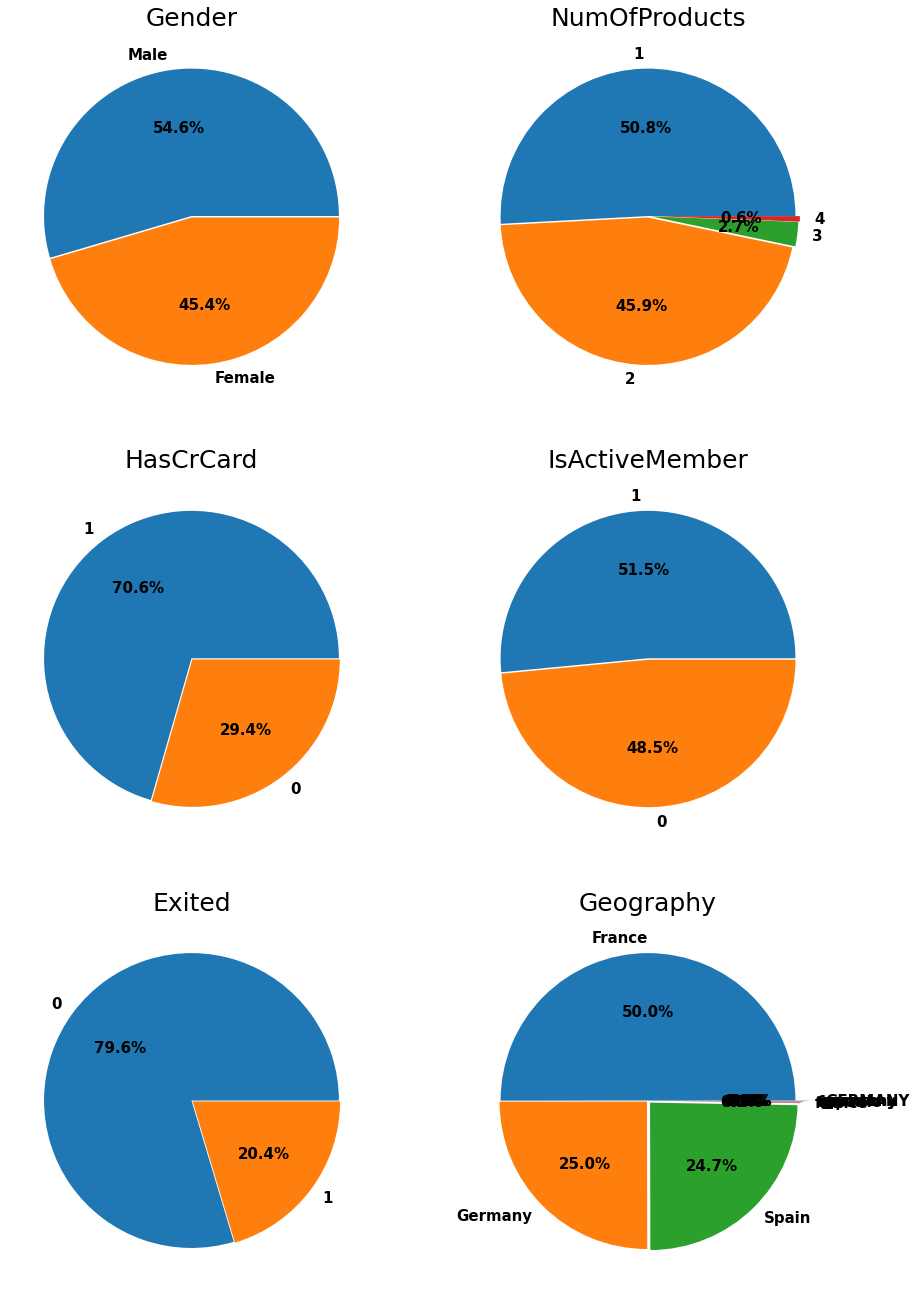

In [16]:
b1=list(enumerate(cat))
plt.figure(figsize=(15,80))
for x in b1:
    plt.subplot(10,2,x[0]+1)
    l=[]
    for a in range(data[x[1]].nunique()):
        l.append(a*0.01)
    plt.pie(x = data[x[1]].value_counts(), autopct = "%.1f%%", labels = data[x[1]].value_counts().keys(),explode=l,textprops={'fontsize':15,'fontweight':'bold'})
    plt.title(f"{x[1]}",fontsize=25)
plt.show()

## Bivariate Analysis

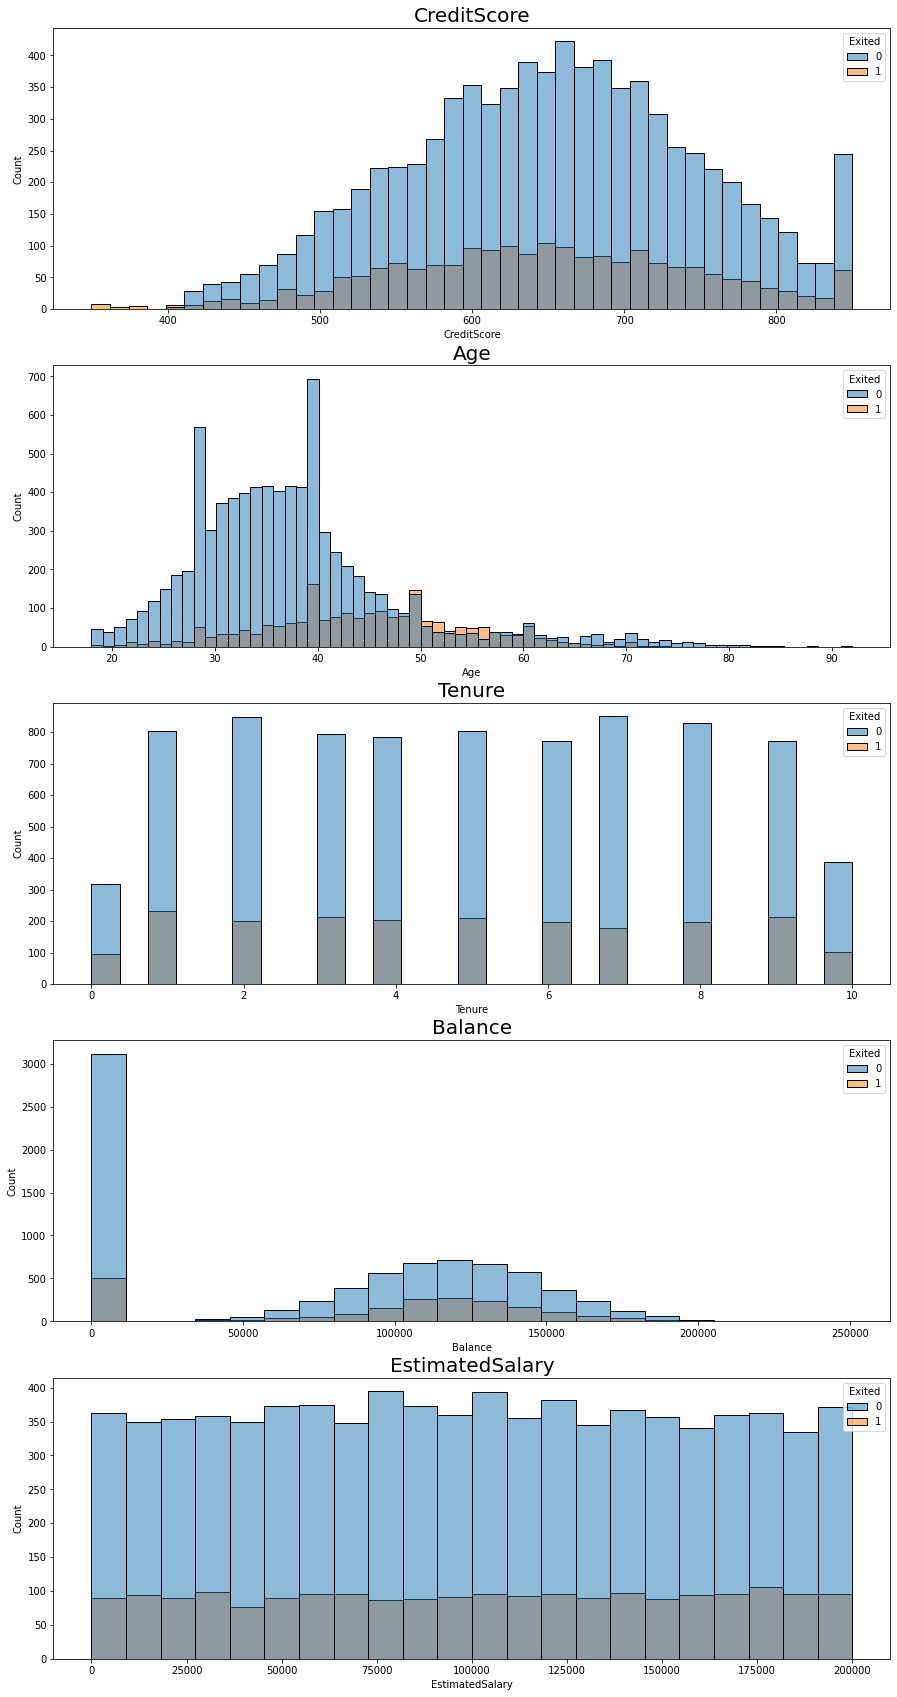

In [17]:
b=list(enumerate(num))
plt.figure(figsize=(15,30))
for x in b:
    plt.subplot(5,1,x[0]+1)
    sns.histplot(x=x[1],hue='Exited',data=data)
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

1. customer between the age of 48 to 60. Are more likely to churn out.
2. customer with credit score less then 400 are more likely to churn out.
3. customer with low balance or high balance are more likely to churn out in range of (30000 to 220000)

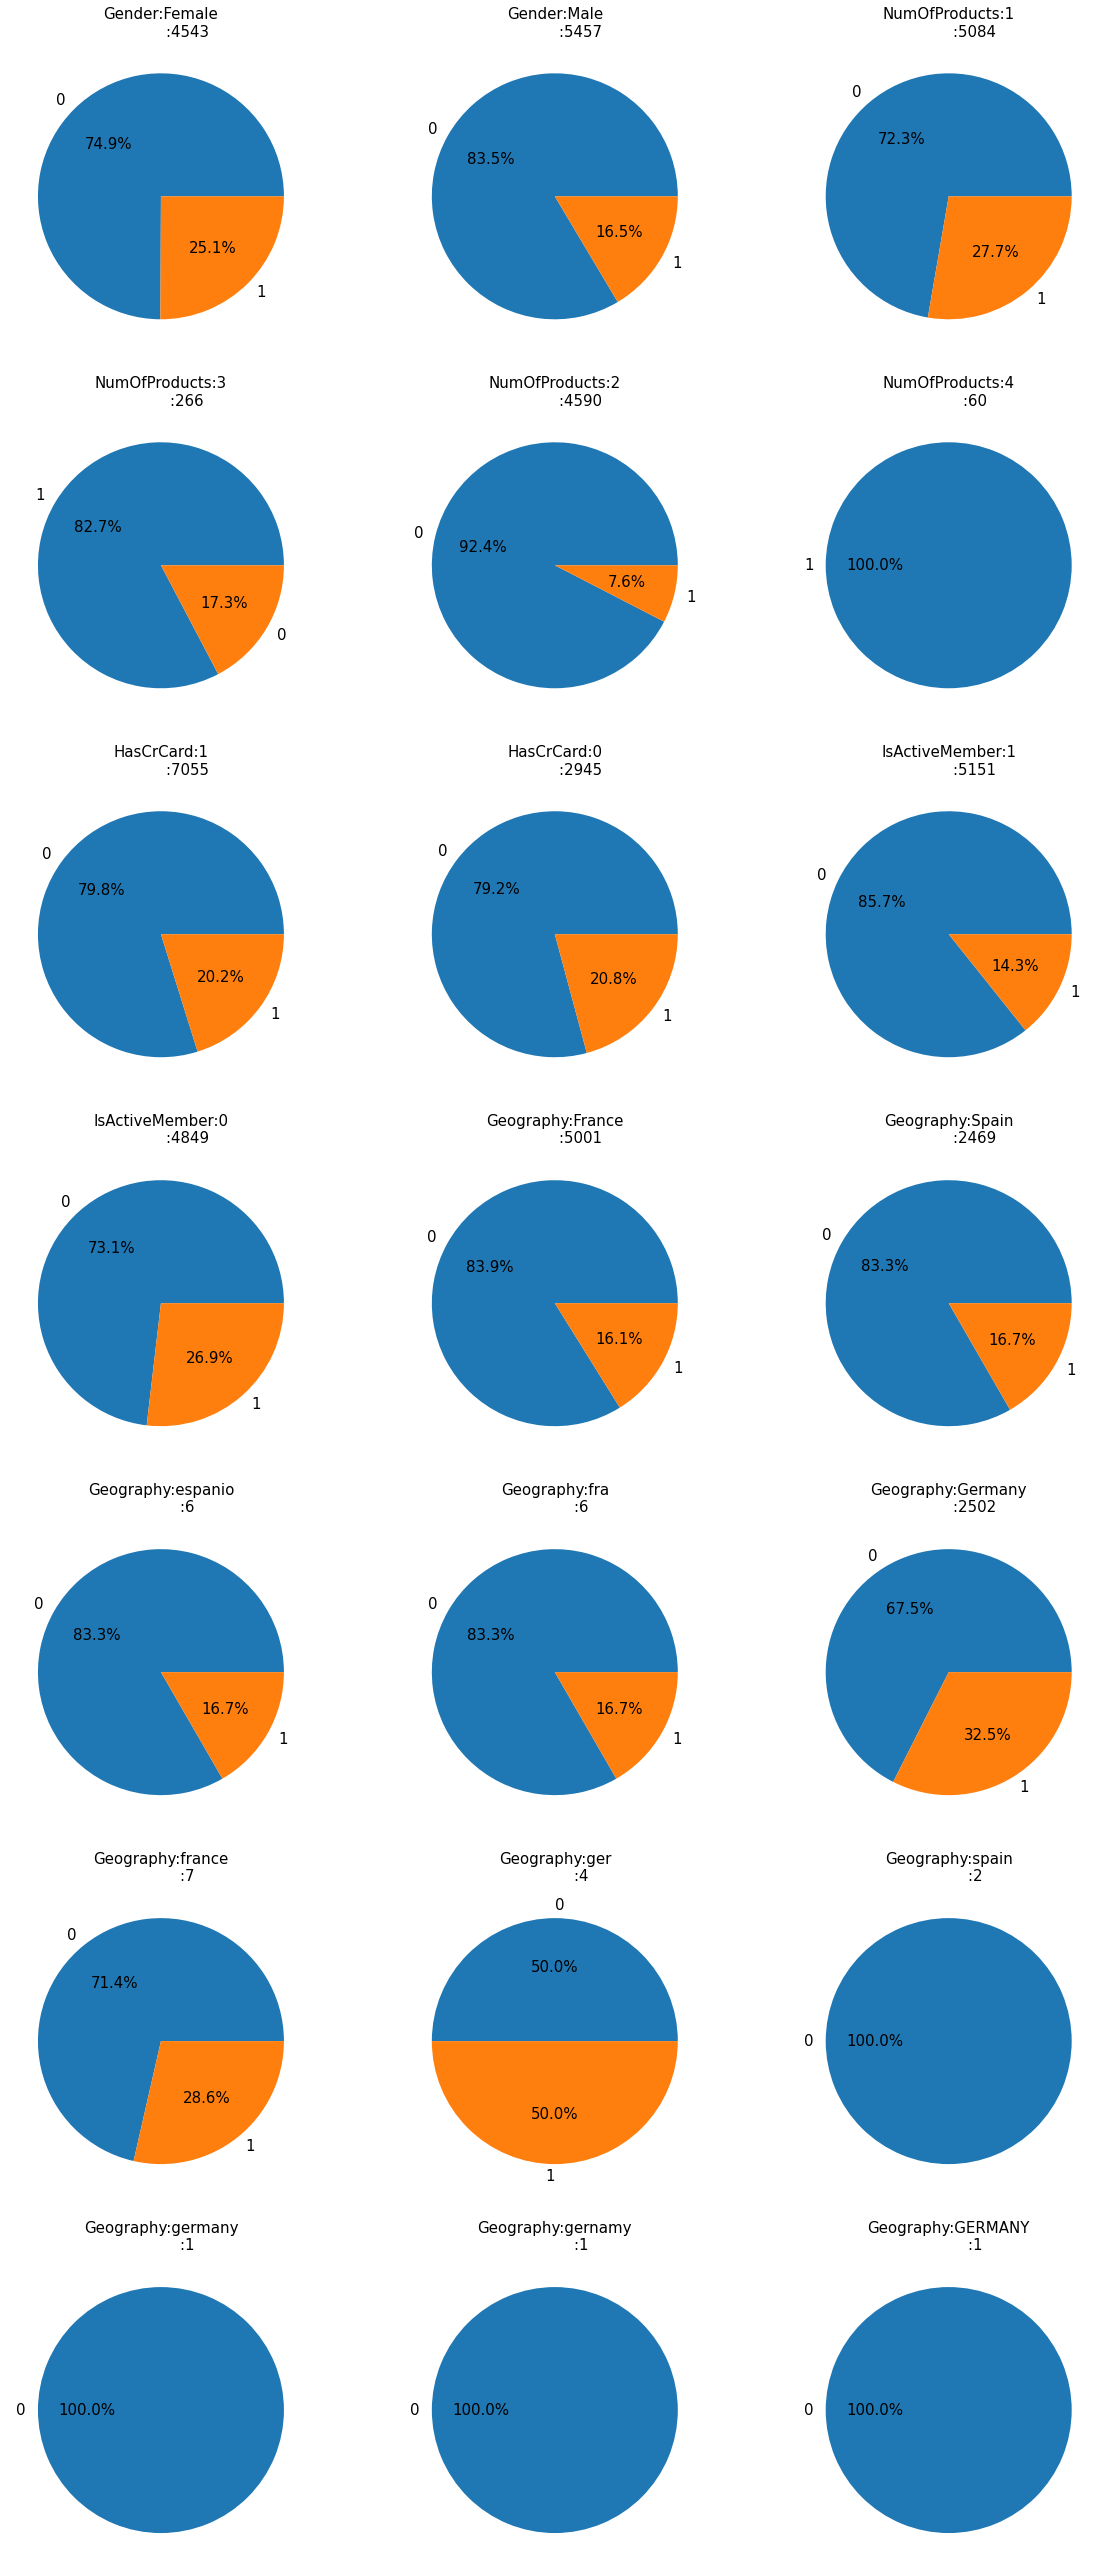

In [18]:
b1=list(enumerate(cat))
plt.figure(figsize=(20,250))
i=0
for x in b1:
    if x[1]!='Exited':
        for y in data[x[1]].unique():
            i=i+1
            plt.subplot(37,3,i)
            plt.pie(x=data['Exited'][data[x[1]]==y].value_counts().values,labels=data['Exited'][data[x[1]]==y].value_counts().index,autopct="%0.01f%%",textprops={'fontsize':15})
            plt.title(f'''{x[1]}:{y}
            :{len(df[x[1]][df[x[1]]==y])} ''',fontsize=15)
    else:
        continue
plt.show()

In [19]:
df.Geography.unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

In [20]:
data['Geography'][(data['Geography']=='france')|(data['Geography']=='fra')]='France'
data['Geography'][(data['Geography']=='germany')|(data['Geography']=='ger')|(data['Geography']=='gernamy')|(data['Geography']=='GERMANY')]='Germany'
data['Geography'][(data['Geography']=='espanio')|(data['Geography']=='spain')]='Spain'

In [21]:
from sklearn import preprocessing
for x in cat:
  label_encoder = preprocessing.LabelEncoder()
  data[x]= label_encoder.fit_transform(data[x])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,1,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,0,1,1,101699.77,0
9997,709,0,0,36,7,0.00,0,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,1,1,0,92888.52,1


In [22]:
data.Geography.unique()

array([0, 2, 1])

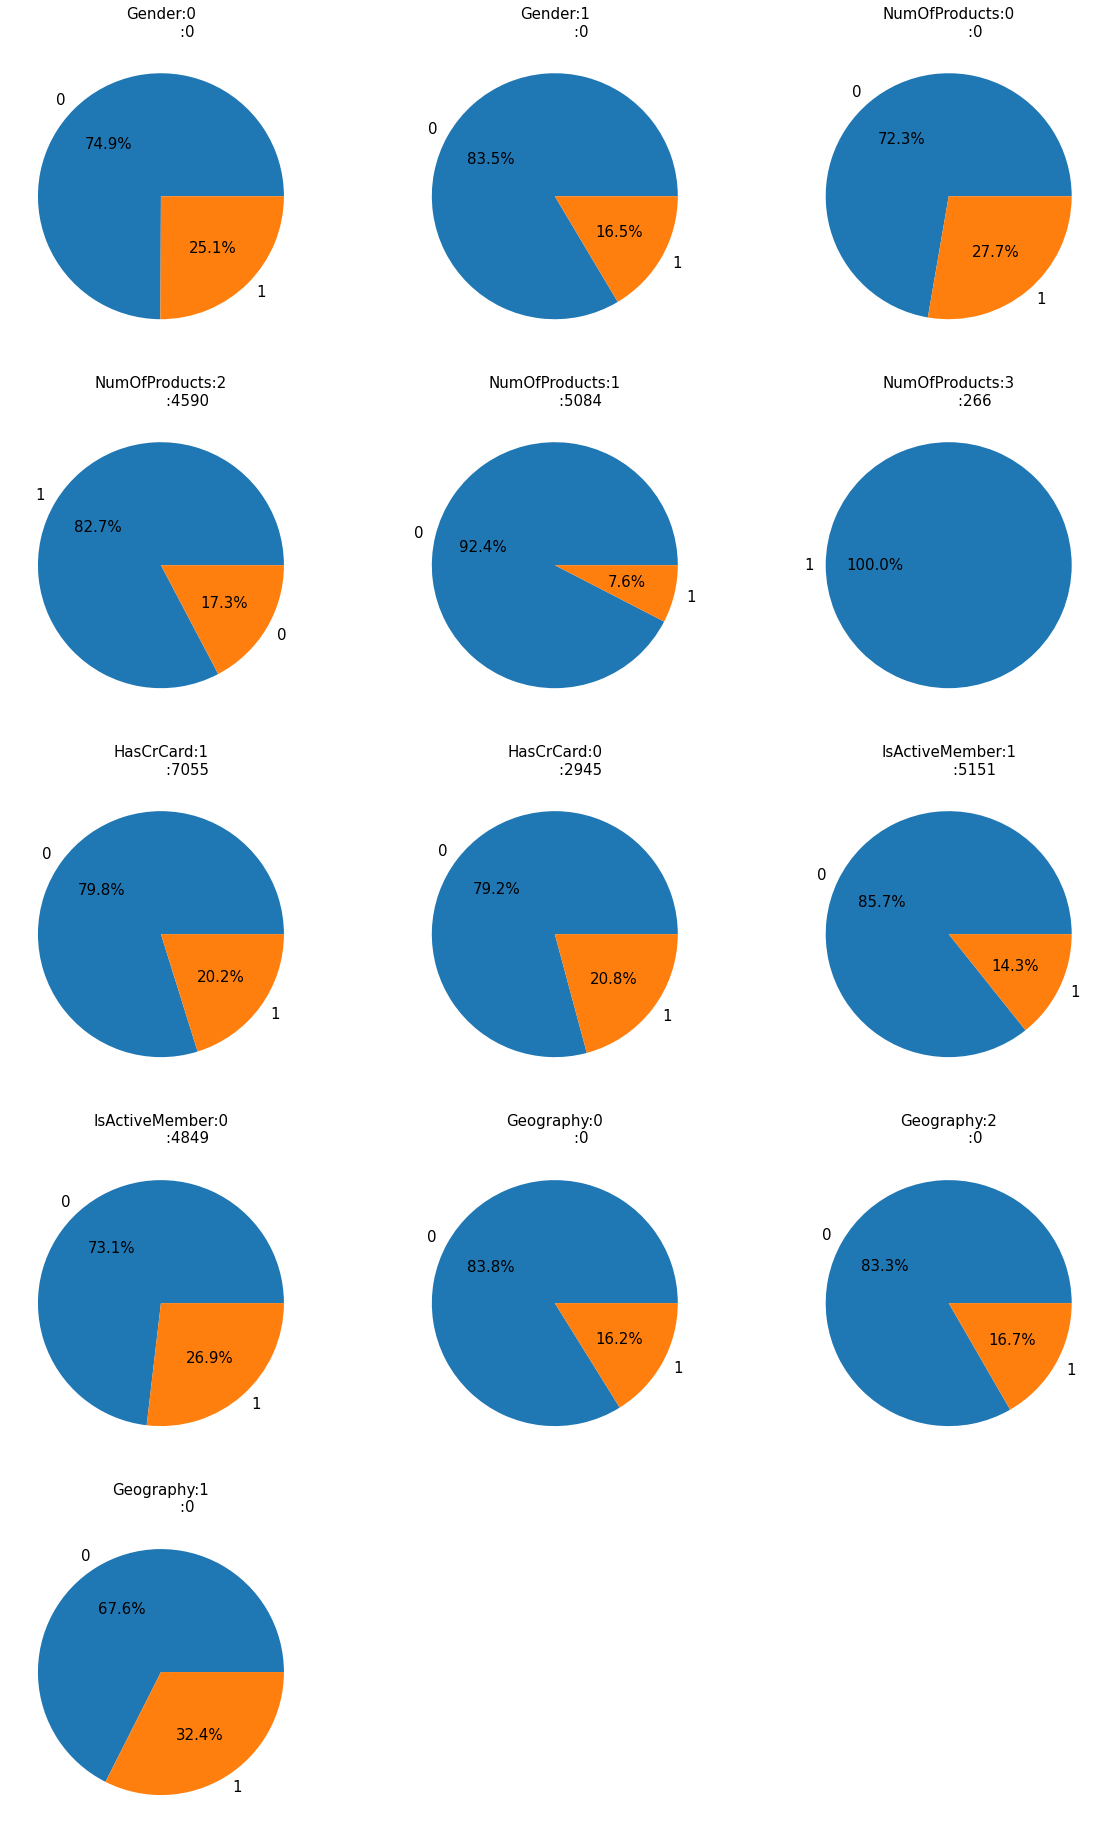

In [23]:
b1=list(enumerate(cat))
plt.figure(figsize=(20,250))
i=0
for x in b1:
    if x[1]!='Exited':
        for y in data[x[1]].unique():
            i=i+1
            plt.subplot(37,3,i)
            plt.pie(x=data['Exited'][data[x[1]]==y].value_counts().values,labels=data['Exited'][data[x[1]]==y].value_counts().index,autopct="%0.01f%%",textprops={'fontsize':15})
            plt.title(f'''{x[1]}:{y}
            :{len(df[x[1]][df[x[1]]==y])} ''',fontsize=15)
    else:
        continue
plt.show()

1. customer with 1 or 2 products are more likely to stay more the 2 there more likely to leave the firm.
2. customer with credit card are more likely to leave
3. the incative member are more likely to leave. 
4. customer from Germany are more likely to leave.

In [24]:
# data=pd.get_dummies(data)
# data.head()

In [25]:
data.corr().loc['Exited'].sort_values()

IsActiveMember    -0.156128
Gender            -0.106512
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Geography          0.035943
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

## Spliting the data

In [26]:
from sklearn.model_selection import train_test_split

X=data.drop('Exited',axis=1)
y=data['Exited']
X1,X_test,y1,y_test=train_test_split(X,y,test_size=0.1,random_state=20)

In [27]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
def AUC_plot(model):
  ns_probs = [0 for _ in range(len(y_test))]
  lr_probs = model.predict_proba(X_test)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  #  calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate') 
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

# Logistics Regression

In [28]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
kf = KFold(n_splits=14)
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    lr = LogisticRegression()
    lr1 = lr.fit(X_train,y_train)
    s = lr1.score(X_val, y_val)
    print(s)

0.8040435458786936
0.7916018662519441
0.8118195956454122
0.7293934681181959
0.7791601866251944
0.776049766718507
0.7993779160186625
0.7729393468118196
0.8009331259720062
0.8087091757387247
0.7916018662519441
0.7931570762052877
0.7866043613707165
0.778816199376947


In [29]:
pred1=lr1.predict(X_test)
print('Accuracy Test :',lr1.score(X_test,y_test))
print('Accuracy Train:',lr1.score(X_train,y_train))

Accuracy Test : 0.812
Accuracy Train: 0.788107202680067


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred1)

array([[801,  22],
       [166,  11]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.671


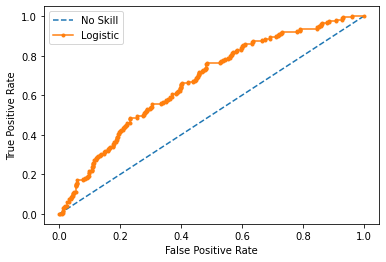

In [32]:
AUC_plot(lr1)

# KNN

In [33]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

knn = neighbors.KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = {'n_neighbors':k_range}
grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy', return_train_score=False)
grid_search=grid.fit(X_train, y_train)


In [34]:
pred2=grid_search.predict(X_test)
print('Accuracy Test :',grid_search.score(X_test,y_test))
print('Accuracy Train:',grid_search.score(X_train,y_train))

Accuracy Test : 0.82
Accuracy Train: 0.7938502033979421


In [36]:
confusion_matrix(y_test,pred2)

array([[820,   3],
       [177,   0]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.548


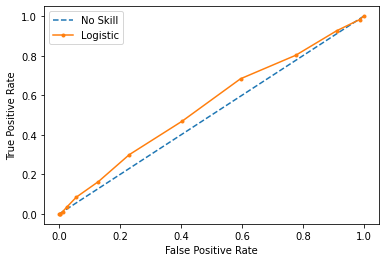

In [37]:
AUC_plot(grid_search)

# Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=14)
for train_index, test_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_val = y1.iloc[train_index], y1.iloc[test_index]
    gnb = GaussianNB()
    GNB=gnb.fit(X_train, y_train)
    s = GNB.score(X_val, y_val)
    print(s)



0.7791601866251944
0.7884914463452566
0.7916018662519441
0.7200622083981337
0.7776049766718507
0.7713841368584758
0.7900466562986003
0.776049766718507
0.7838258164852255
0.7978227060653188
0.7962674961119751
0.7884914463452566
0.7881619937694704
0.7881619937694704


In [39]:
pred3=GNB.predict(X_test)
print('Accuracy Test :',GNB.score(X_test,y_test))
print('Accuracy Train:',GNB.score(X_train,y_train))

Accuracy Test : 0.806
Accuracy Train: 0.7814070351758794


In [41]:

confusion_matrix(y_test,pred3)

array([[790,  33],
       [161,  16]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.755


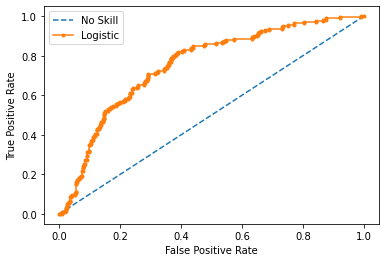

In [42]:
AUC_plot(GNB)

# Decision Tree Classifier

In [43]:
from sklearn import tree
kf = KFold(n_splits=14)
for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6]}
    clf = tree.DecisionTreeClassifier()
    clf_cv=GridSearchCV(clf,grid, cv=5)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    dtc = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = dtc.score(X_val, y_val)
    print(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
0.8643356643356643
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8391608391608392
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8545454545454545
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
0.848951048951049
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8487394957983193
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
0.8683473389355743
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8543417366946778
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8431372549019608
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8501400560224089
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8711484593837535
tu

In [44]:
pred4=dtc.predict(X_test)
print('Accuracy Test :',dtc.score(X_test,y_test))
print('Accuracy Train:',dtc.score(X_train,y_train))

Accuracy Test : 0.892
Accuracy Train: 0.8589274176179195


In [46]:
confusion_matrix(y_test,pred4)

array([[807,  16],
       [ 92,  85]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.863


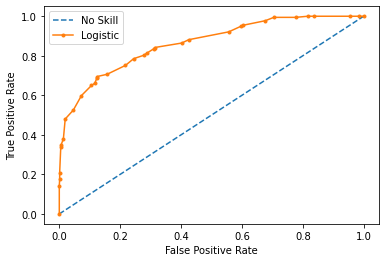

In [47]:
AUC_plot(dtc)

# Randon Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=14)
for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6]}
    rfc = RandomForestClassifier()
    rfc_cv=GridSearchCV(clf,grid, cv=5)
    rfc_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
    rfc = RandomForestClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = rfc.score(X_val, y_val)
    print(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
0.8727272727272727
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8419580419580419
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8503496503496504
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
0.8587412587412587
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8501400560224089
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6}
0.8697478991596639
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8529411764705882
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8487394957983193
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8501400560224089
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.8739495798319328
t

In [49]:
pred5=rfc.predict(X_test)
print('Accuracy Test :',rfc.score(X_test,y_test))
print('Accuracy Train:',rfc.score(X_train,y_train))

Accuracy Test : 0.895
Accuracy Train: 0.861296575489985


In [51]:
confusion_matrix(y_test,pred5)

array([[809,  14],
       [ 91,  86]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.887


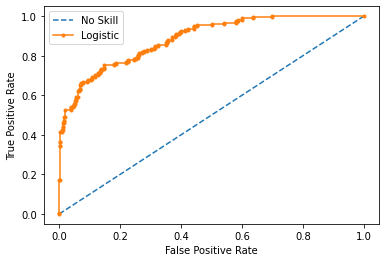

In [52]:
AUC_plot(rfc)

# Deep Neural Network

In [53]:
import tensorflow as tf

In [54]:
X_train,X_val,y_train,y_val=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [55]:
# set random seed:
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'relu'),
                             tf.keras.layers.Dense(5, activation = 'relu'), 
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

# change the loss and metrics of our compile model:
model.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs = 100 ,validation_data = (X_val, y_val),verbose= True)

Epoch 1/100
197/197 [==============================] - 2s 4ms/step - loss: 8.6661 - accuracy: 0.7776 - val_loss: 0.6426 - val_accuracy: 0.7937
Epoch 2/100
197/197 [==============================] - 1s 3ms/step - loss: 0.6226 - accuracy: 0.7932 - val_loss: 0.6040 - val_accuracy: 0.7937
Epoch 3/100
197/197 [==============================] - 1s 6ms/step - loss: 0.5894 - accuracy: 0.7932 - val_loss: 0.5756 - val_accuracy: 0.7937
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 0.5650 - accuracy: 0.7932 - val_loss: 0.5549 - val_accuracy: 0.7937
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 0.5474 - accuracy: 0.7932 - val_loss: 0.5398 - val_accuracy: 0.7937
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 0.5348 - accuracy: 0.7932 - val_loss: 0.5294 - val_accuracy: 0.7937
Epoch 7/100
197/197 [==============================] - 1s 3ms/step - loss: 0.5261 - accuracy: 0.7932 - val_loss: 0.5223 - val_accuracy: 0.7937

In [56]:
# evaluate the model on test data:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8230


[0.4696640074253082, 0.8230000138282776]

# The Best model is Random Forest Classification with Test Accuracy of 89.6

In [57]:
check=rfc.predict_proba(data.iloc[:,:-1])*100
check


array([[74.30469888, 25.69530112],
       [81.14196984, 18.85803016],
       [15.30221227, 84.69778773],
       ...,
       [84.65376378, 15.34623622],
       [83.91776073, 16.08223927],
       [83.59890281, 16.40109719]])

In [58]:
id=pd.concat([id,pd.DataFrame(check[:,1],columns=['probability'])],axis=1)

In [61]:
id[id.Exited==0].sort_values(by='probability',ascending=False)

,CustomerId,Surname,Exited,probability
313,15797960,Skinner,0,72.622125
8553,15791321,Nwora,0,71.090891
7803,15691504,Yusupova,0,69.821911
9610,15812534,Chiemenam,0,69.466264
4886,15657468,Simmons,0,68.187120
...,...,...,...,...
982,15792360,Clark,0,2.437952
9320,15780215,Berry,0,2.437498
3394,15668460,Bellucci,0,2.295824
7617,15678779,Quezada,0,2.233514
